In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-literacy-dataset-xlsx/financial_literacy_dataset.xlsx


1. **Essential Packages Importing**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

2. **loading Data For Usage**

In [3]:
def summary(df):
    '''
    i will briefly summarise the most important infos
    '''
    print(f'DataFrame Shape Is \n{df.shape}\n\n')
    summ=pd.DataFrame(df.dtypes,columns=['Data Types'])
    summ['Missing#']=df.isna().sum()
    summ['Mussing%']=(df.isna().sum())/df.shape[0]
    summ['Duplicate']=df.duplicated().sum()
    summ['Unique']=df.nunique().values
    desc=df.describe(include='all').transpose()
    summ['Min']=desc['min'].values
    summ['Max']=desc['max'].values
    summ['standatd dev']=desc['std'].values
    summ['Mean']=desc['mean'].values
    summ['First Value']=df.loc[0].values
    display(summ)
    print('DataFrame First Rows ..')
    display(df.head(10))

In [4]:
path='/kaggle/input/financial-literacy-dataset-xlsx/financial_literacy_dataset.xlsx'

In [5]:
def read_df(path):

    try:
        all_sheets_dict = pd.read_excel(path, sheet_name=None)
        if not all_sheets_dict:
             print(f"Warning: The file '{path}' contains no sheets.")
             return pd.DataFrame()

        all_df = pd.concat(all_sheets_dict.values(), ignore_index=True)
        return all_df

    except ValueError as e:
        print(f"Error reading Excel file: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
        

3. **Have the sense of data**

In [6]:
df = read_df(path)
if df is not None:
    display(summary(df))

DataFrame Shape Is 
(100, 5)




,Data Types,Missing#,Mussing%,Duplicate,Unique,Min,Max,standatd dev,Mean,First Value
Age Group,object,0,0.00,0,6,NaN,NaN,NaN,NaN,55+
Household Income,object,2,0.02,0,3,NaN,NaN,NaN,NaN,"Low (<$30,000)"
Education Level,object,4,0.04,0,4,NaN,NaN,NaN,NaN,Some College
Financial Literacy Score,float64,3,0.03,0,65,0.0,98.0,31.032131,51.082474,12.0
Location,object,1,0.01,0,3,NaN,NaN,NaN,NaN,Rural


DataFrame First Rows ..


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age Group,Household Income,Education Level,Financial Literacy Score,Location
0,55+,"Low (<$30,000)",Some College,12.0,Rural
1,Under 18,"Middle ($30,000-$70,000)",Some College,92.0,Urban
2,45-54,"High (>$70,000)",Bachelorâ€™s Degree,6.0,Urban
3,18-24,"Middle ($30,000-$70,000)",Some College,9.0,Rural
4,45-54,"High (>$70,000)",Bachelorâ€™s Degree,27.0,Urban
5,25-34,"Low (<$30,000)",Bachelorâ€™s Degree,47.0,Urban
6,Under 18,"High (>$70,000)",Some College,27.0,Urban
7,Under 18,"Middle ($30,000-$70,000)",High School or Less,NaN,Urban
8,35-44,"Low (<$30,000)",Graduate Degree,71.0,Suburban
9,55+,"Middle ($30,000-$70,000)",Graduate Degree,55.0,Urban


None

**Key Insights**

- we have just one numerical feature "which should be dealt with if the case was to train a model afterwards"
- the dataset if **free** from duplicates
- we have all features but age_group have missing values
- the missing rate is relatively small "maximum of 0.04


**Actions To Perform**

- figure the missing value to have a sense of it and then
   - we are safe to delete it because of the low affection of it in the whole data
   - we could replace the numerical feature "Financial Literacy Score" with the median "to reduce the affect of outliers"
   - we could use sophisticated methods like KNN Imputer to fill it 'that will be after and affected by the filling of categorical features'
   - we could fill missing categories with either (Mode/static_value)
- removing and cleaning "Financial Literacy Score" feom outliers

**Actions I Recommend Choosing**



1. using scikitlearn Impute package to fill Financial Literacy Score"
2. filling the other categorical features will static record "Missed" to study the act of collecting missed values

4. **DATA CLEANING PHASE**

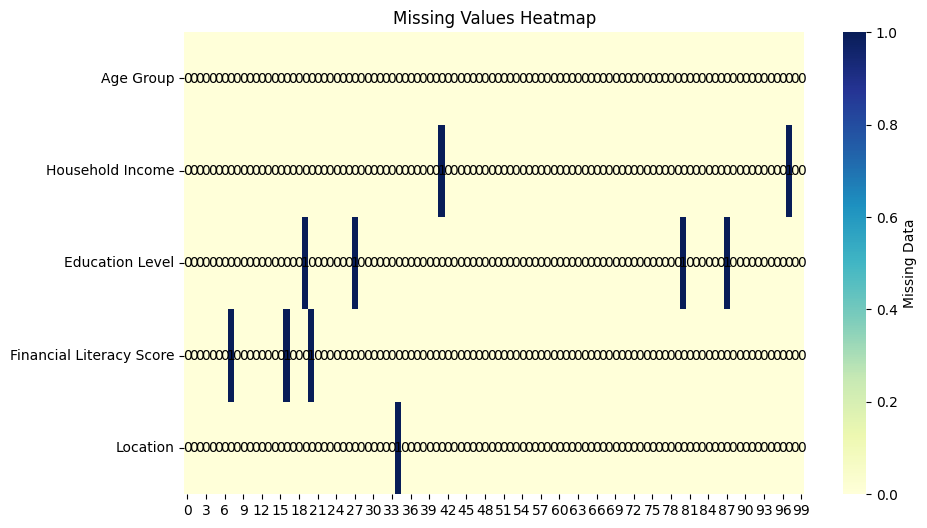

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull().transpose(),
            cbar_kws={'label': 'Missing Data'},
            cmap="YlGnBu", annot=True, annot_kws={"color": "black"})
plt.title('Missing Values Heatmap')
plt.show()

Text(0.5, 1.0, 'Missing Values Heatmap')

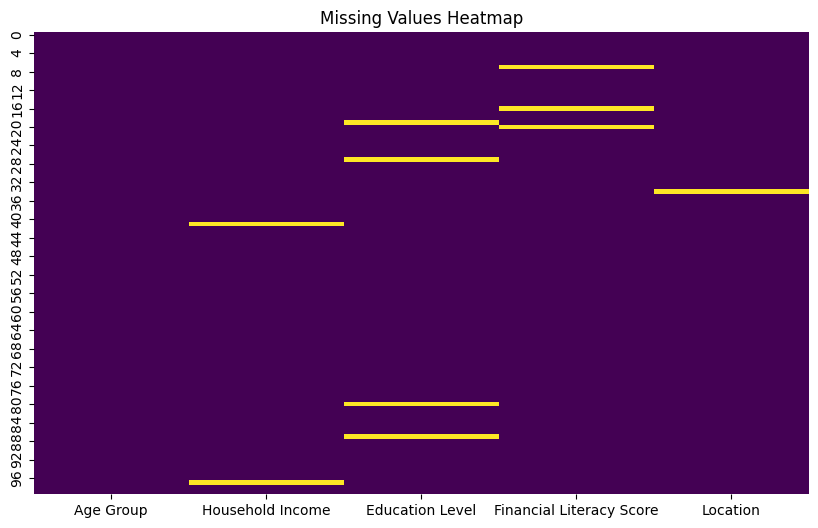

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

*the missed values almost neglected as we could se*

In [9]:
df_droped=df.dropna()

In [10]:
print(df.shape)
print(df_droped.shape)

(100, 5)
(90, 5)


In [11]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
# 1. Impute Categorical Features:
categorical_cols = df.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='Missing')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

**IMBORTANT CAUTION**

- We need to label any categorical feature before using KNN but we will reverse it afterwards 

In [13]:
# 2. Encode Categorical Features for KNN Imputation:
# KNN Imputer works with numerical data, so label encode the categorical data
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# 3. Impute Numerical Feature using KNN:
imputer_knn = KNNImputer(n_neighbors=2)
df['Financial Literacy Score'] = imputer_knn.fit_transform(df[['Financial Literacy Score']])

In [15]:
df.head()

,Age Group,Household Income,Education Level,Financial Literacy Score,Location
0,4,1,4,12.0,1
1,5,2,4,92.0,3
2,3,0,0,6.0,3
3,0,2,4,9.0,1
4,3,0,0,27.0,3


**NOTICE**

- the each category has been changed with numerical one "if we to model a MACHINE LEARNING algorithm we would do some similar thing

- but we will reverse it now

In [16]:
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col].astype(int))

In [17]:
df.head()

,Age Group,Household Income,Education Level,Financial Literacy Score,Location
0,55+,"Low (<$30,000)",Some College,12.0,Rural
1,Under 18,"Middle ($30,000-$70,000)",Some College,92.0,Urban
2,45-54,"High (>$70,000)",Bachelorâ€™s Degree,6.0,Urban
3,18-24,"Middle ($30,000-$70,000)",Some College,9.0,Rural
4,45-54,"High (>$70,000)",Bachelorâ€™s Degree,27.0,Urban


**DEMONSTRATION**

* we restored our categories


**WHAT'S NOW**

* let's figure a demonstration for be sure there's no missing values now

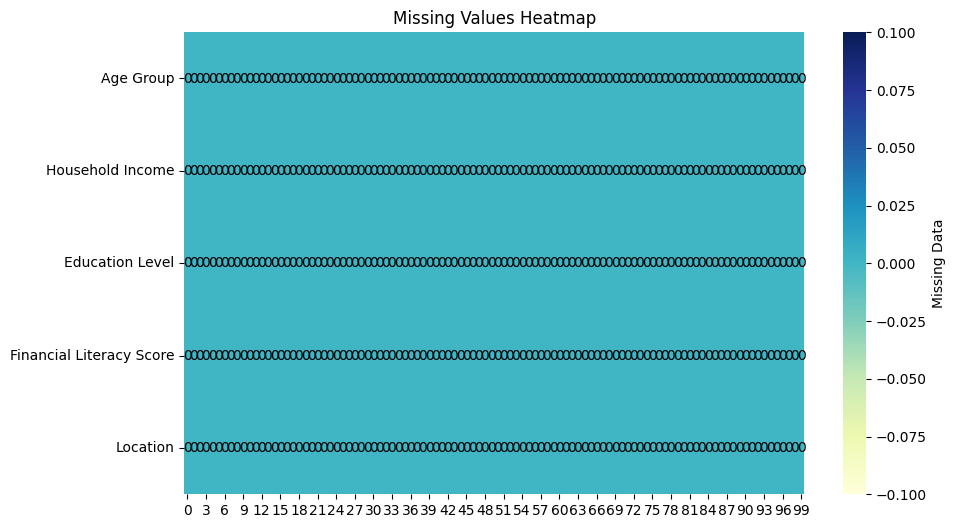

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull().transpose(),
            cbar_kws={'label': 'Missing Data'},
            cmap="YlGnBu", annot=True, annot_kws={"color": "black"})
plt.title('Missing Values Heatmap')
plt.show()

Text(0.5, 1.0, 'Missing Values Heatmap')

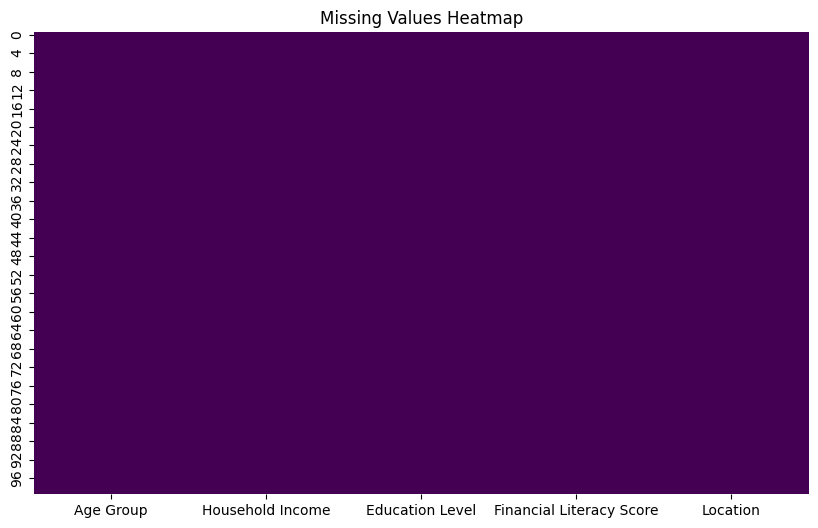

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

***THAT'S FINE***

**BEFORE** trying to remove outliers we will plot it to have the sense of it's distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


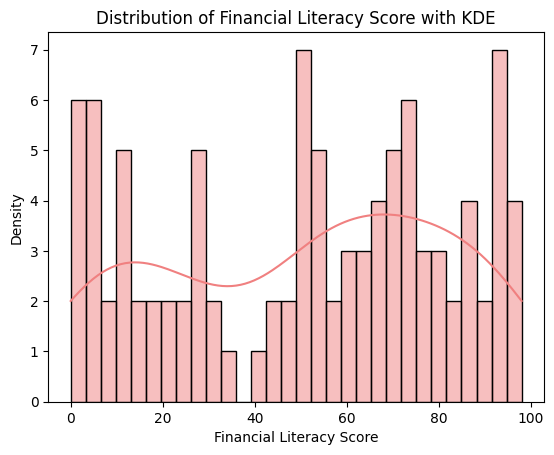

In [20]:
sns.histplot(df['Financial Literacy Score'], kde=True,bins=30, color="lightcoral")
plt.title('Distribution of Financial Literacy Score with KDE')
plt.xlabel('Financial Literacy Score')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='Financial Literacy Score'>

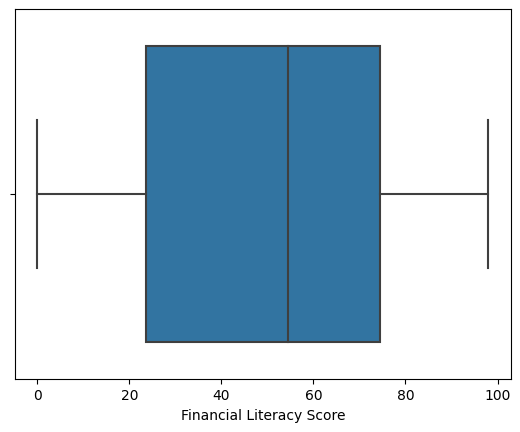

In [21]:
sns.boxplot(x=df['Financial Literacy Score'])

**NOTE**

- the IQR is large so the outliers not affect the data as much

**NOW**

- the time for removing outliers **BUT**
   - we can use **IsolationForest**
   - or just z-score approch
   - or inter quartile range approach

**Optimization**

* we will measure the difference by MEAN value because it affected alot by outliers

In [22]:
from sklearn.ensemble import IsolationForest
outlier_detector = IsolationForest(contamination=0.1)  # Adjust contamination as needed
outliers = outlier_detector.fit_predict(df[['Financial Literacy Score']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [23]:
df_cleaned = df[outliers != -1]

In [24]:
df_cleaned['Financial Literacy Score'].mean()

51.94777387560893

In [25]:
from scipy import stats
df_zscore = df.copy()
df_zscore['zscore'] = np.abs(stats.zscore(df_zscore['Financial Literacy Score'])) #Calculate the z-score
df_zscore_cleaned = df_zscore[df_zscore['zscore'] < 3] #Remove the outliers with z-score greater than 3


In [26]:
df_zscore_cleaned['Financial Literacy Score'].mean()

51.08247422680412

In [27]:
df_iqr = df.copy()
Q1 = df_iqr['Financial Literacy Score'].quantile(0.25)
Q3 = df_iqr['Financial Literacy Score'].quantile(0.75)
IQR = Q3 - Q1
df_iqr_cleaned = df_iqr[~((df_iqr['Financial Literacy Score'] < (Q1 - 1.5 * IQR)) |(df_iqr['Financial Literacy Score'] > (Q3 + 1.5 * IQR)))]
df_iqr_cleaned['Financial Literacy Score'].mean()

51.08247422680412

**CAUTION**

* for optimization reasons i will use the **IQR** version

In [28]:
df=df_iqr_cleaned.copy()

5. **DATA ANALYSIS PHASE**

- Calculate average financial literacy scores for each demographic group (age, income, education, and location).await

In [29]:
cat_cols=[col for col in df.select_dtypes(include=['object']).columns]
for col in cat_cols:
    display(df[[col,'Financial Literacy Score']].groupby(col).mean()['Financial Literacy Score'])

Age Group
18-24       46.888889
25-34       55.050000
35-44       52.705882
45-54       44.006344
55+         54.588235
Under 18    51.144330
Name: Financial Literacy Score, dtype: float64

Household Income
High (>$70,000)             46.905886
Low (<$30,000)              53.000000
Middle ($30,000-$70,000)    52.714867
Missing                     57.000000
Name: Financial Literacy Score, dtype: float64

Education Level
Bachelorâ€™s Degree    44.438368
Graduate Degree        56.895803
High School or Less    52.738832
Missing                52.500000
Some College           49.733333
Name: Financial Literacy Score, dtype: float64

Location
Missing     33.000000
Rural       50.142857
Suburban    53.729124
Urban       49.099435
Name: Financial Literacy Score, dtype: float64

**KEY TAKEOUTS**

- the most aware age category as rated with 'Financial Literacy Score' is the people from (25/34) , then (+55) we could depict that as 

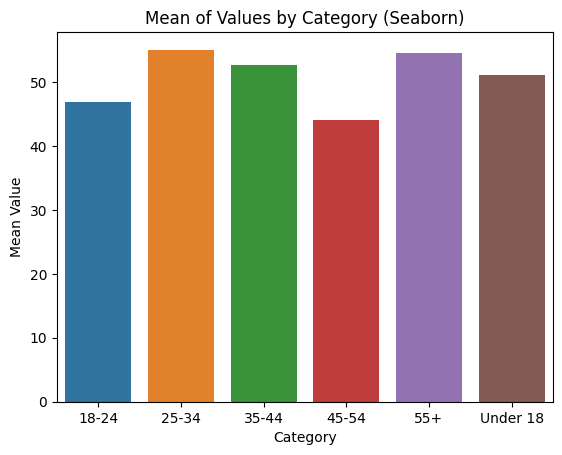

In [30]:
mean_values = df.groupby('Age Group')['Financial Literacy Score'].mean()
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title('Mean of Values by Category (Seaborn)')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

**KEY TAKEOUTS 2**abs

- unexpectedly the low household income score the highest Financial Literacy Score
   - of course i suggest that is due to the missing values which "Truly" was the top score one
   - we need here to ask the data analyst manager about the police of dealing with that
   - [email](rafiptashny@gmail.com)

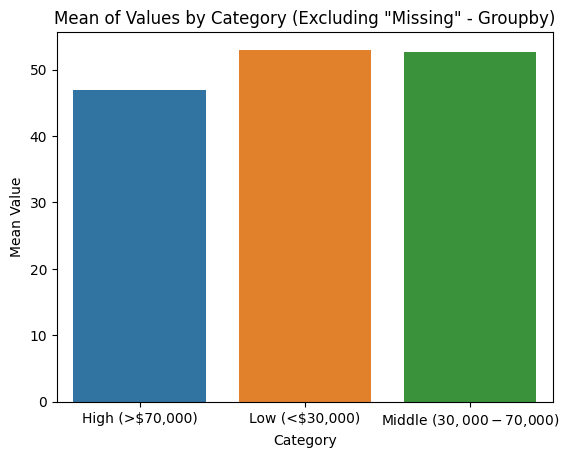

In [31]:
mean_values = df.groupby('Household Income')['Financial Literacy Score'].mean()
mean_values_filtered = mean_values[mean_values.index != 'Missing']
sns.barplot(x=mean_values_filtered.index, y=mean_values_filtered.values)
plt.title('Mean of Values by Category (Excluding "Missing" - Groupby)')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

**KEY TAKEOUTS 3**abs

- graduate degree Peoples are the top ones on Financial Literacy Score
   - i also suggest missing values played a role here

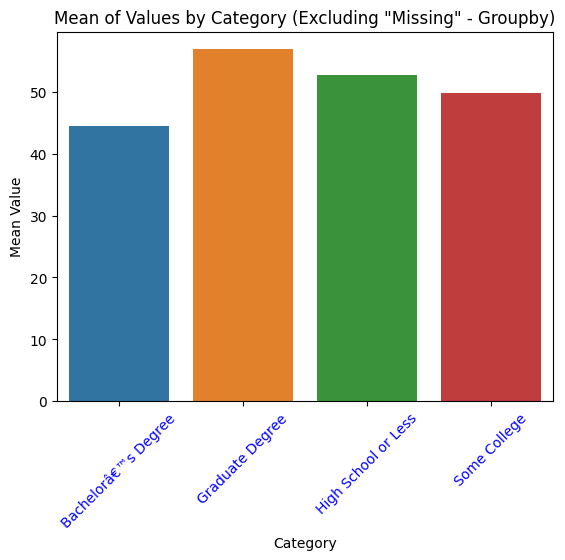

In [32]:
mean_values = df.groupby('Education Level')['Financial Literacy Score'].mean()
mean_values_filtered = mean_values[mean_values.index != 'Missing']
sns.barplot(x=mean_values_filtered.index, y=mean_values_filtered.values)
plt.title('Mean of Values by Category (Excluding "Missing" - Groupby)')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, color='blue')
plt.show()

**KEY TAKEOUTS 4**

- Suburban locations had the top Financial Literacy Score as we directed

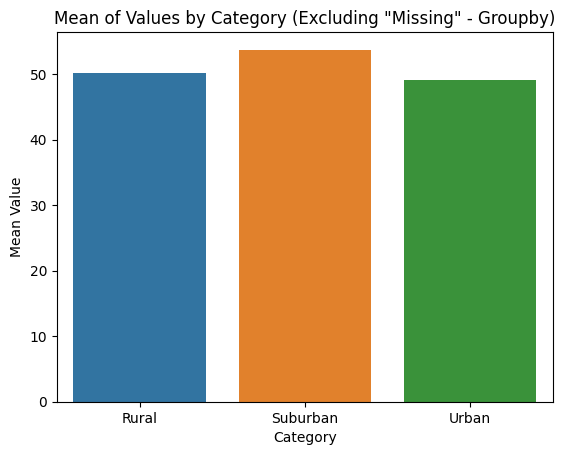

In [33]:
mean_values = df.groupby('Location')['Financial Literacy Score'].mean()
mean_values_filtered = mean_values[mean_values.index != 'Missing']
sns.barplot(x=mean_values_filtered.index, y=mean_values_filtered.values)
plt.title('Mean of Values by Category (Excluding "Missing" - Groupby)')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.show()

- Identify patterns or groups with significantly lower scores.

In [34]:
grouped=df[['Education Level','Age Group','Financial Literacy Score']].groupby(by=['Education Level','Age Group']).mean()['Financial Literacy Score']
grouped

Education Level      Age Group
Bachelorâ€™s Degree  18-24        46.600000
                     25-34        68.333333
                     35-44        31.833333
                     45-54        35.333333
                     55+          59.000000
                     Under 18     25.541237
Graduate Degree      18-24        48.000000
                     25-34        74.428571
                     35-44        67.400000
                     45-54        53.726068
                     55+          52.000000
                     Under 18     19.666667
High School or Less  18-24        54.250000
                     25-34        24.666667
                     35-44        93.000000
                     45-54        22.000000
                     55+          48.666667
                     Under 18     79.694158
Missing              25-34        49.000000
                     35-44        97.000000
                     45-54        15.000000
Some College         18-24        41.666667
 

**THAT'S WORKED** of course but will be long un recommended way so

- let's figure every column against the others "without repeating"

to quickly and accurately find conclusions 

Examination Of Age Group Against Household Income


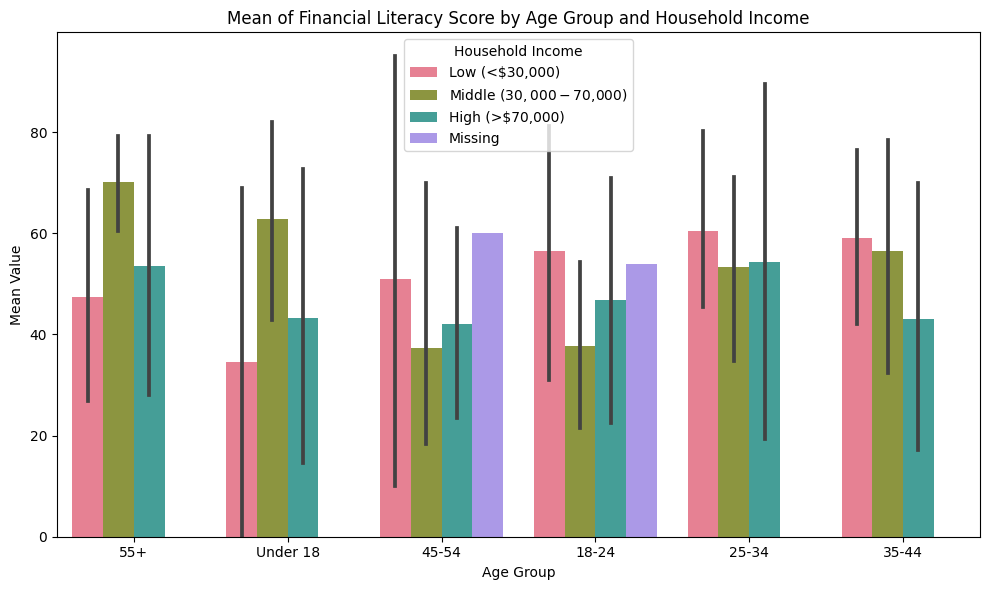





Examination Of Age Group Against Education Level


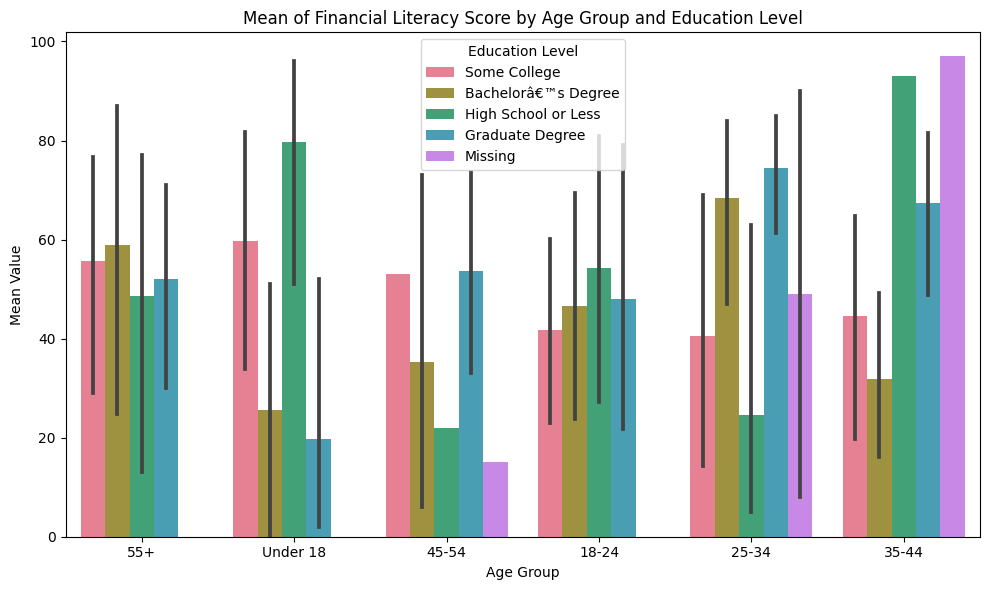





Examination Of Age Group Against Location


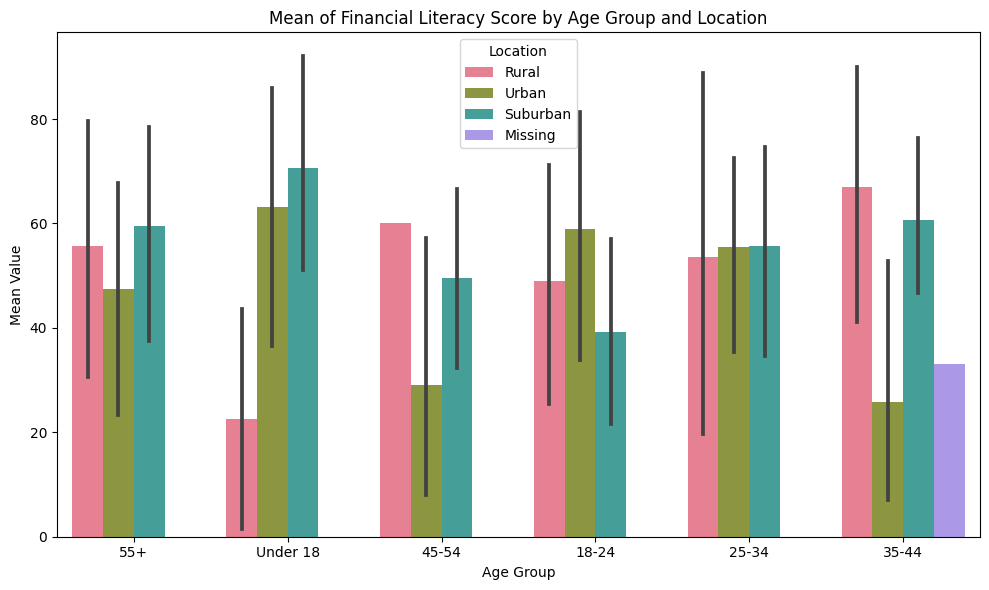





Examination Of Household Income Against Education Level


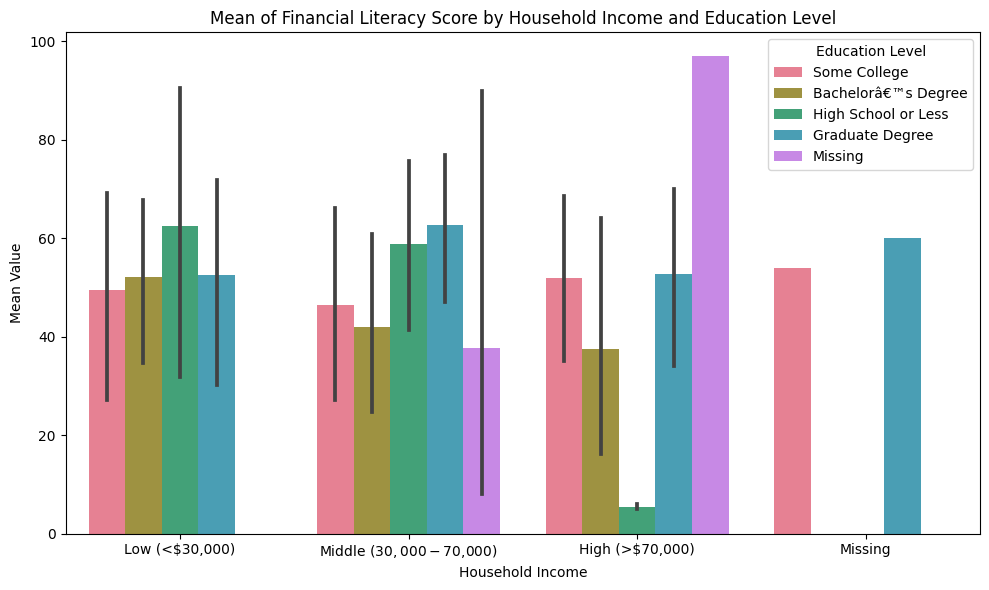





Examination Of Household Income Against Location


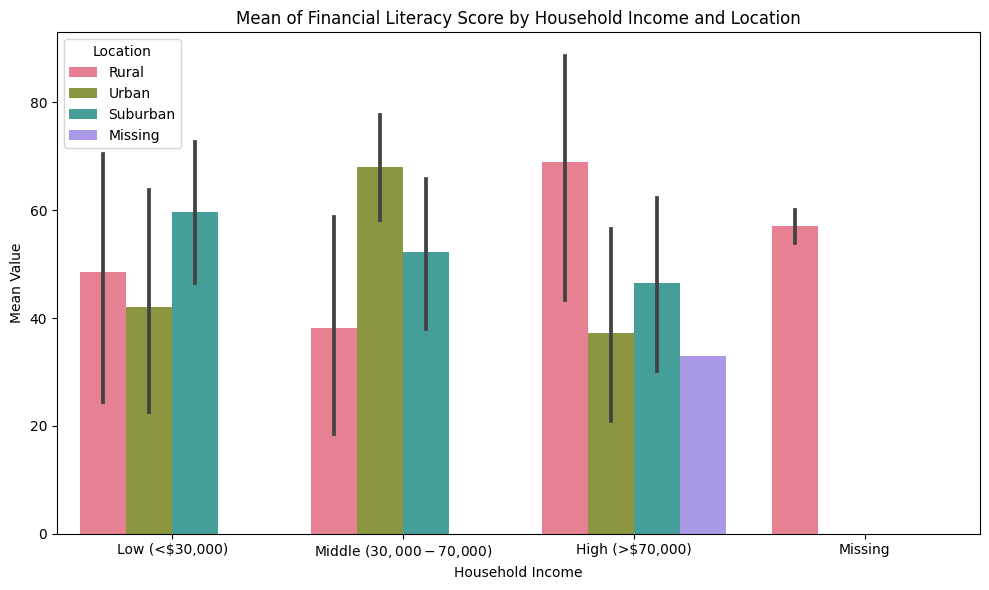





Examination Of Education Level Against Location


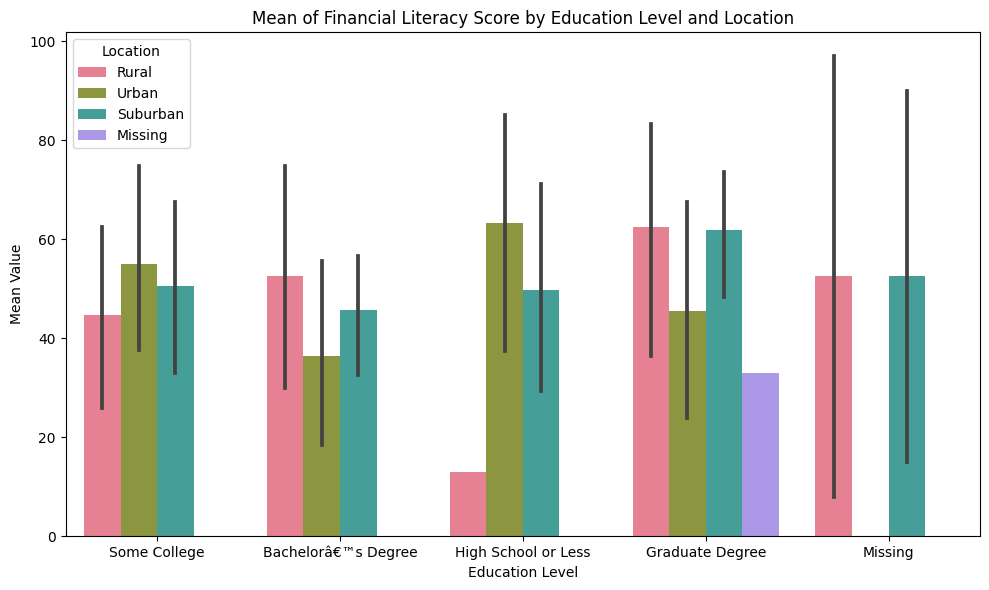

In [35]:
for i in range(len(cat_cols)):
    for j in range(i+1,len(cat_cols)):
        col1=cat_cols[i]
        col2=cat_cols[j]
        print(f'Examination Of {col1} Against {col2}')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col1, y='Financial Literacy Score', hue=col2, data=df, palette="husl")
        plt.title(f'Mean of Financial Literacy Score by {col1} and {col2}')
        plt.xlabel(col1)
        plt.ylabel('Mean Value')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(3*'\n')

In [36]:
pivot_mean = pd.pivot_table(df, values='Financial Literacy Score', index='Household Income', columns='Location', aggfunc='mean')
display(pivot_mean)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Location,Missing,Rural,Suburban,Urban
Household Income,,,,
"High (>$70,000)",33.0,68.857143,46.453608,37.214286
"Low (<$30,000)",NaN,48.625000,59.733333,42.000000
"Middle ($30,000-$70,000)",NaN,38.090909,52.192655,68.098407
Missing,NaN,57.000000,NaN,NaN


In [37]:
pivot_stats = pd.pivot_table(df, values='Financial Literacy Score', index='Household Income', columns='Location', aggfunc=['mean', 'median', 'count'])
display(pivot_stats)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


mean                                   median  \
Location                 Missing      Rural   Suburban      Urban Missing   
Household Income                                                            
High (>$70,000)             33.0  68.857143  46.453608  37.214286    33.0   
Low (<$30,000)               NaN  48.625000  59.733333  42.000000     NaN   
Middle ($30,000-$70,000)     NaN  38.090909  52.192655  68.098407     NaN   
Missing                      NaN  57.000000        NaN        NaN     NaN   

                                                  count                       
Location                 Rural   Suburban Urban Missing Rural Suburban Urban  
Household Income                                                              
High (>$70,000)           74.0  51.082474  27.0     1.0   7.0      9.0  14.0  
Low (<$30,000)            59.5  65.000000  35.5     NaN   8.0     15.0   6.0  
Middle ($30,000-$70,000)  19.0  55.041237  66.0     NaN  11.0     16.0  11.0  
Missing                   57.0        NaN   NaN     NaN   2.0      NaN   NaN

In [38]:
x=df.groupby(by=['Location','Household Income','Education Level','Age Group']).mean()['Financial Literacy Score'].sort_values(ascending=False).head(5)
x

Location  Household Income  Education Level      Age Group
Rural     High (>$70,000)   Missing              35-44        97.0
                            Some College         25-34        94.0
Suburban  Low (<$30,000)    High School or Less  35-44        93.0
Rural     High (>$70,000)   Bachelorâ€™s Degree  55+          93.0
Urban     High (>$70,000)   Graduate Degree      25-34        93.0
Name: Financial Literacy Score, dtype: float64

**FINAL REPORT AND RECOMMENDATIONS**

- will be included in a dedicated file

**finally**

- extract the csv and xlsx files

In [39]:
df.to_csv('output.csv')
df.to_excel('output.xlsx')

**NOW WE WILL RETEST FOR DROPPED DATASET**

- the figures and code will be here and i will left the description to the report 

In [40]:
df_iqr = df_droped.copy()
Q1 = df_iqr['Financial Literacy Score'].quantile(0.25)
Q3 = df_iqr['Financial Literacy Score'].quantile(0.75)
IQR = Q3 - Q1
df_iqr_cleaned = df_iqr[~((df_iqr['Financial Literacy Score'] < (Q1 - 1.5 * IQR)) |(df_iqr['Financial Literacy Score'] > (Q3 + 1.5 * IQR)))]
df_iqr_cleaned['Financial Literacy Score'].mean()
df_droped=df_iqr_cleaned.copy()

In [41]:
for col in cat_cols:
    display(df_droped[[col,'Financial Literacy Score']].groupby(col).mean()['Financial Literacy Score'])

Age Group
18-24       46.470588
25-34       55.722222
35-44       51.066667
45-54       44.600000
55+         54.588235
Under 18    51.153846
Name: Financial Literacy Score, dtype: float64

Household Income
High (>$70,000)             45.464286
Low (<$30,000)              53.000000
Middle ($30,000-$70,000)    54.181818
Name: Financial Literacy Score, dtype: float64

Education Level
Bachelorâ€™s Degree    44.136364
Graduate Degree        57.960000
High School or Less    52.857143
Some College           49.586207
Name: Financial Literacy Score, dtype: float64

Location
Rural       49.375000
Suburban    53.944444
Urban       49.033333
Name: Financial Literacy Score, dtype: float64

Examination Of Age Group Against Household Income


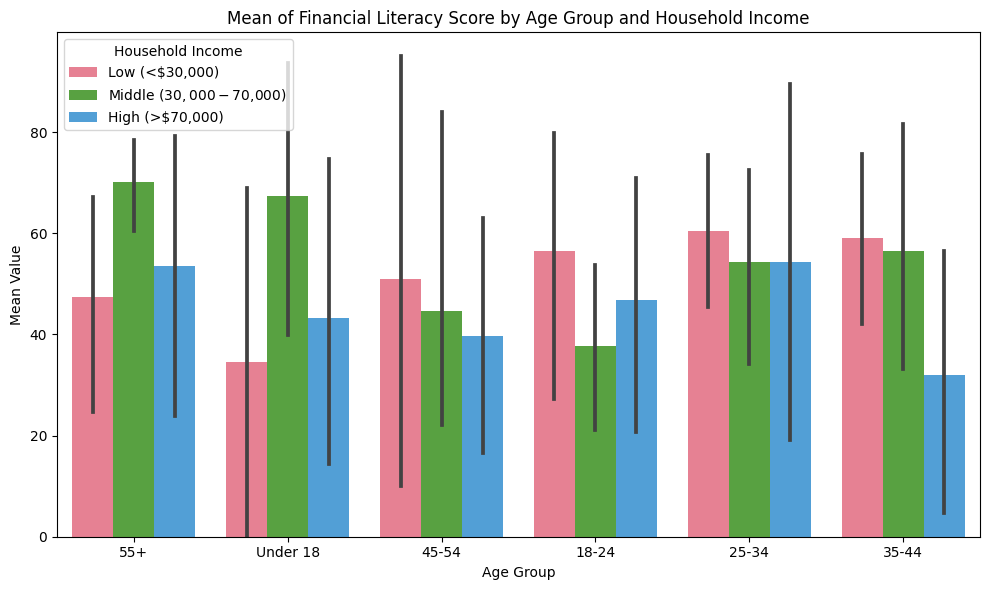





Examination Of Age Group Against Education Level


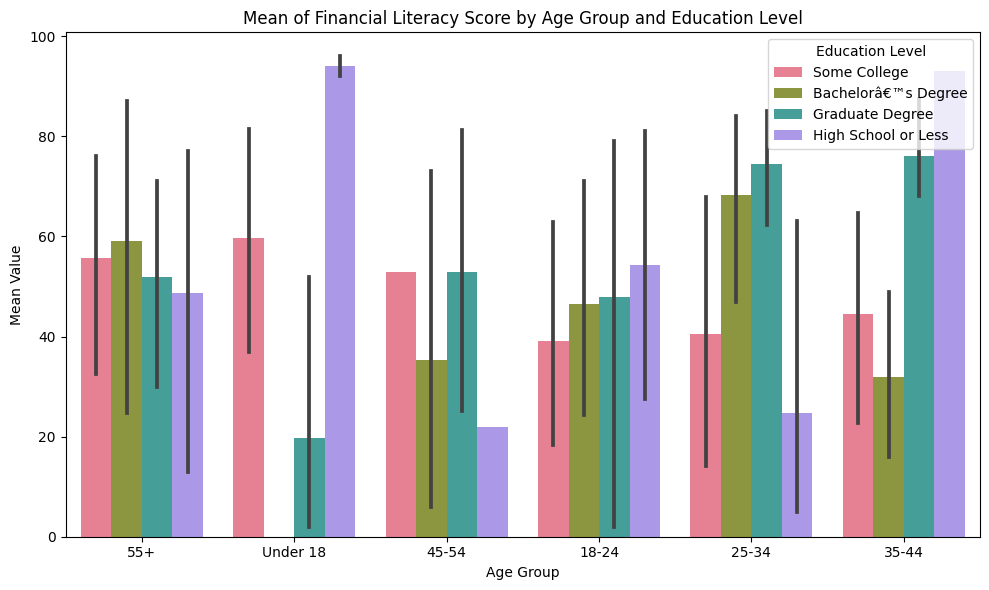





Examination Of Age Group Against Location


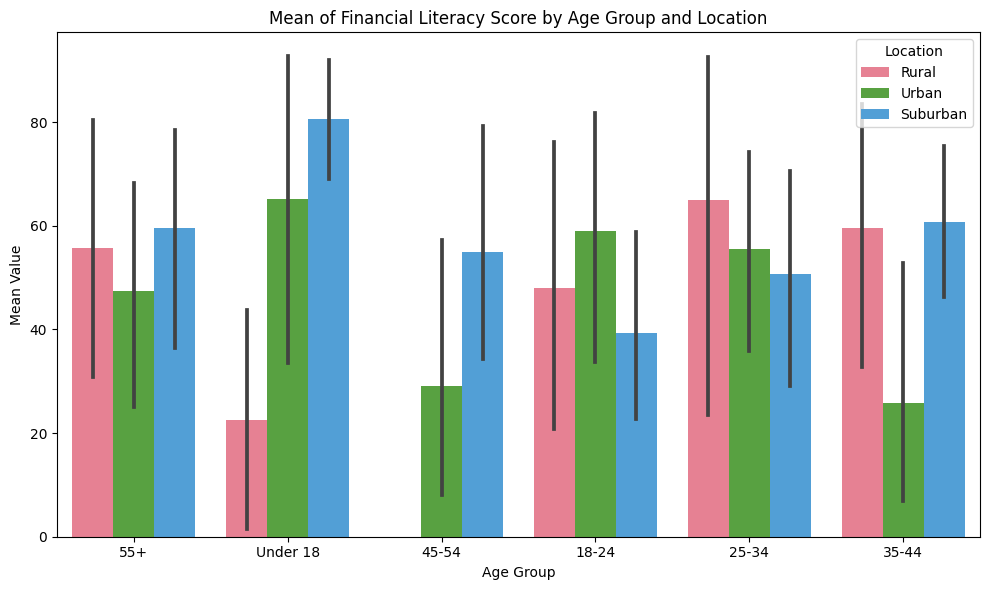





Examination Of Household Income Against Education Level


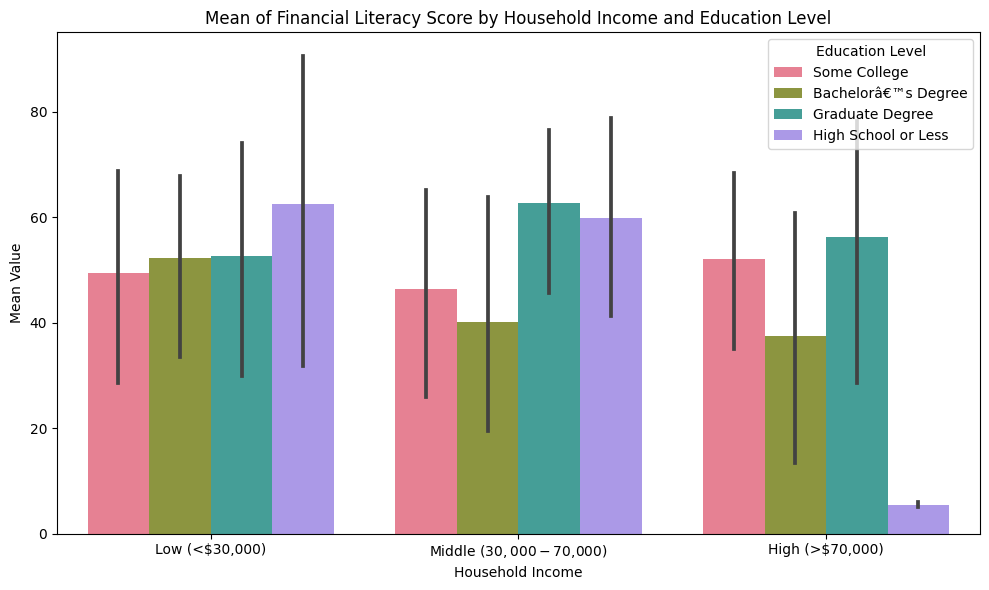





Examination Of Household Income Against Location


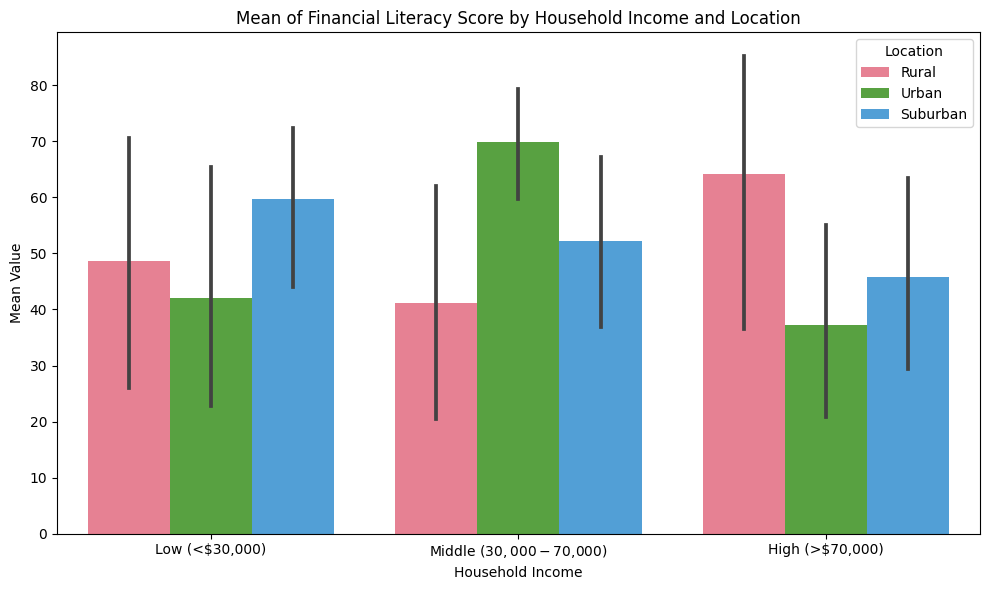





Examination Of Education Level Against Location


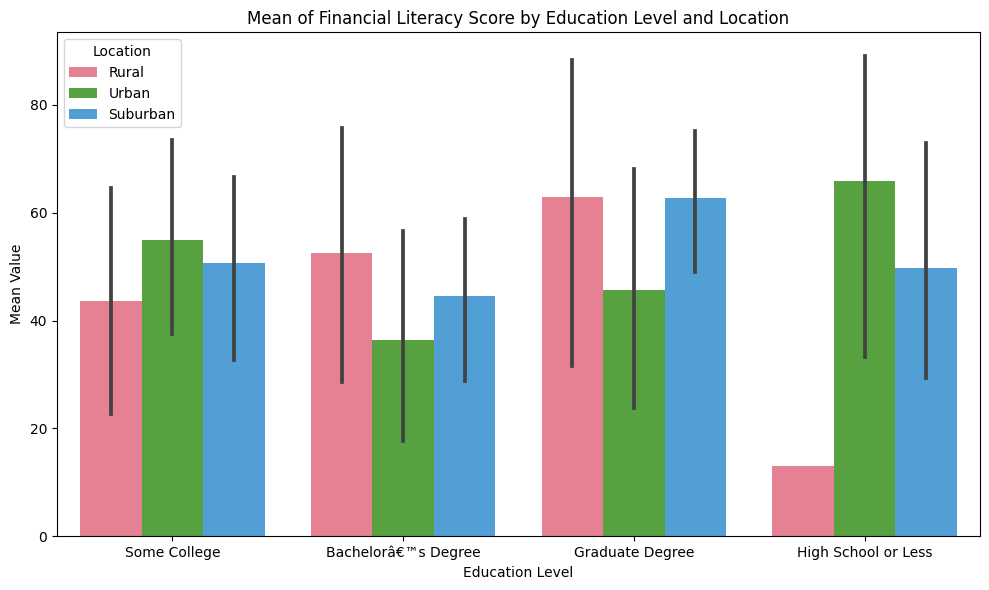

In [42]:
for i in range(len(cat_cols)):
    for j in range(i+1,len(cat_cols)):
        col1=cat_cols[i]
        col2=cat_cols[j]
        print(f'Examination Of {col1} Against {col2}')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col1, y='Financial Literacy Score', hue=col2, data=df_droped, palette="husl")
        plt.title(f'Mean of Financial Literacy Score by {col1} and {col2}')
        plt.xlabel(col1)
        plt.ylabel('Mean Value')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        print(3*'\n')

In [43]:
pivot_mean = pd.pivot_table(df_droped, values='Financial Literacy Score', index='Household Income', columns='Location', aggfunc='mean')
display(pivot_mean)


Location,Rural,Suburban,Urban
Household Income,,,
"High (>$70,000)",64.166667,45.875000,37.214286
"Low (<$30,000)",48.625000,59.733333,42.000000
"Middle ($30,000-$70,000)",41.100000,52.230769,69.800000
